# BBC Classifier


In this demo, we will create a classifier using SKLearn based from the available data set from BBC. The raw files can be downloaded here:
http://mlg.ucd.ie/datasets/bbc.html.

When we unzip the folder, bbc has subdirectories namely; business, entertainment, politics, sport and tech. We can use these folders as our target categories or labels. Each folder contains files belonged to the category.


Note: README text file is removed for convinient parsing and contains.
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

If you make use of the dataset, please consider citing the publication: 
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

All rights, including copyright, in the content of the original articles are owned by the BBC.

Contact Derek Greene <derek.greene@ucd.ie> for further information.
http://mlg.ucd.ie/datasets/bbc.html



## Loading Packages
A pre-defined ArticleClassifier class is also loaded.

In [10]:
import sys
import os
sys.path.insert(0, 'C:/summit_server/BusinessAnalytics')
from jupyter_files.bow.article_classifier import ArticleClassifier
import pandas as pd
from sklearn.externals import joblib

## Loading the Data

Let us check first if we have the desired list of folders in our path, 'bbc'

In [2]:
dir_list = os.listdir(os.path.abspath('bbc'))
dir_list

['business', 'entertainment', 'politics', 'sport', 'tech']

Great! We see that we have the 5 lists of categories that later we will use as labels.
Now, Let us define a function that scans all the contents for each category and list them all in pandas dataframe.

In [3]:
def loader(path):
    """Input contents to dataframe with corresponding label."""
    data = pd.DataFrame([], columns=['input', 'label'])
    for folder in dir_list:
        file_list = os.listdir(os.path.abspath(path + '/' + folder))
        for f in file_list:
            with open(path + '/'+ folder + '/' + f, 'r', newline='') as f:
                data.loc[data['input'].shape[0] + 1,'input'] = f.read().strip()
                data.loc[data['input'].shape[0], 'label'] = str(folder)
    return data

Let us check our dataframe.

In [4]:
df = loader('bbc')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 1 to 2225
Data columns (total 2 columns):
input    2225 non-null object
label    2225 non-null object
dtypes: object(2)
memory usage: 98.8+ KB


In [5]:
df.head(5)

,input,label
1,Ad sales boost Time Warner profit\n\nQuarterly...,business
2,Dollar gains on Greenspan speech\n\nThe dollar...,business
3,Yukos unit buyer faces loan claim\n\nThe owner...,business
4,High fuel prices hit BA's profits\n\nBritish A...,business
5,Pernod takeover talk lifts Domecq\n\nShares in...,business


We can see from the above lines that there are 2225 entries which correspond to the number of documents. We also show the first 5 entries in the dataframe.
Now, we want our test set to have samples for every category. Hence, we shuffle the data set before we can divide it into train and test sets. 

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,input,label
0,Sony wares win innovation award\n\nSony has ta...,tech
1,EU referendum question unveiled\n\nThe questio...,politics
2,Volcano drama erupts on BBC One\n\nSupervolcan...,entertainment
3,US blogger fired by her airline\n\nA US airlin...,tech
4,Markets signal Brazilian recovery\n\nThe Brazi...,business


Again, we checked the first 5 entries and showed that data set is now randomized.

## Classifier
Now that our training data is set, let us create a classifier. We first initialize our pre-built class, 'ArticleClassifier'. Then, let's extract some features and test which model performs best.

In [7]:
classifier = ArticleClassifier(plot=True)
classifier.extract_features(df, store_vect=True)
classifier.X_train.shape, classifier.X_test.shape

Extracting features from the training data using a sparse vectorizer
Training set:  1780
Testing set:  445
done in 0.569614s at 3124.924MB/s
n_samples: 1780, n_features: 26618

Extracting features from the test data using the same vectorizer
done in 0.115967s at 3837.313MB/s
n_samples: 445, n_features: 26618

Saved  C:\summit_server\BusinessAnalytics\jupyter_files\bow\bbc\vectorizer.pkl


((1780, 26618), (445, 26618))

From the above lines, we initialized the classifier object with a parameter plot set to True. Then we extract the features and save the vectorizer for later use.
The output shows that we have 1780 data set extracted for training and 445 for testing. The corresponding train and test labels are stored in the classifier attributes as y_train and y_test, respectively. 

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.300s
test time:  0.000s
accuracy:   0.991
dimensionality: 26618
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=50, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.133s
test time:  0.000s
accuracy:   0.987
dimensionality: 26618
density: 0.229183


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=50,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.198s
test time:  0.016s
accuracy:   0.993
dimensionality: 26618
density: 0.708175


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
train time: 0.000s
test time:  0.053s
accuracy:   0.982

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 1.783s
test time:  0.034s
accuracy:   0.971


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.217s
test time:  0.001s
accuracy:   0.987
dimensionality: 26618
density: 0.004193


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.402s
test time:  0.001s
accuracy:   0.987
dimensionality: 26618
density: 0.016185


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.684s
test time:  0.002s
accuracy:   0.989
dimensionality: 26618
density: 0.161132


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.009s
test time:  0.000s
accuracy:   0.973

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.000s
test time:  0.016s
accuracy:   0.984
dimensionality: 26618
density: 1.000000


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.016s
test time:  0.000s
accuracy:   0.973
dimensionality: 26618
density: 1.000000


LinearSVC with L1-based feature selection
________________________________________________________________________________
Traini

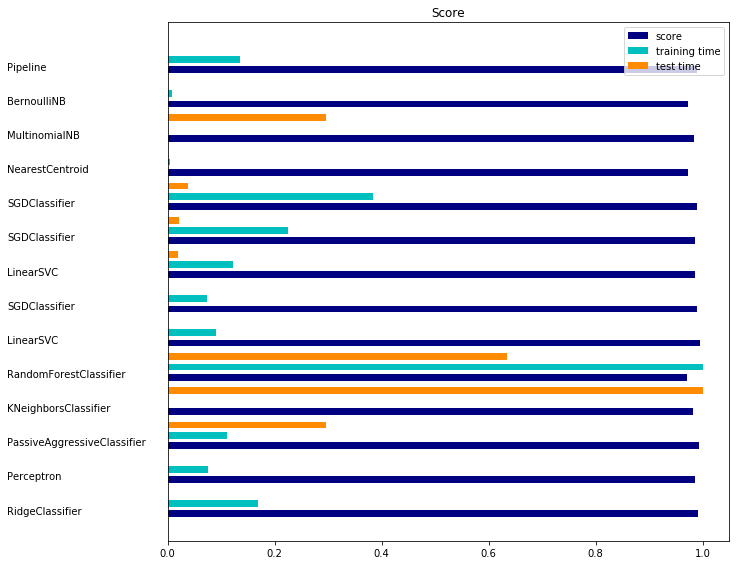

[('RidgeClassifier', 0.9910112359550561, 0.3004786968231201, 0.0),
 ('Perceptron', 0.9865168539325843, 0.13333344459533691, 0.0),
 ('PassiveAggressiveClassifier',
  0.9932584269662922,
  0.19795513153076172,
  0.015651941299438477),
 ('KNeighborsClassifier', 0.9820224719101124, 0.0, 0.05297660827636719),
 ('RandomForestClassifier',
  0.9707865168539326,
  1.7828903198242188,
  0.03361701965332031),
 ('LinearSVC', 0.9955056179775281, 0.1596202850341797, 0.0),
 ('SGDClassifier', 0.9887640449438202, 0.13146662712097168, 0.0),
 ('LinearSVC', 0.9865168539325843, 0.21695637702941895, 0.0009996891021728516),
 ('SGDClassifier',
  0.9865168539325843,
  0.4021480083465576,
  0.0011272430419921875),
 ('SGDClassifier',
  0.9887640449438202,
  0.6842203140258789,
  0.001974821090698242),
 ('NearestCentroid', 0.9730337078651685, 0.009052276611328125, 0.0),
 ('MultinomialNB', 0.9842696629213483, 0.0, 0.015659570693969727),
 ('BernoulliNB', 0.9730337078651685, 0.015623092651367188, 0.0),
 ('Pipeline',

In [8]:
classifier.test_classifier()

We can find that SGDClassfiers performs best. Let us create an SGDClassifier.


In [13]:
classifier.select_sgdclf(penalty='l2', store=True)

L2 penalty
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.154s
test time:  0.000s
accuracy:   0.989
dimensionality: 26618
density: 0.667811


Saved  C:\summit_server\BusinessAnalytics\jupyter_files\bow\bbc\sgd_clf.pkl


c:\users\administrator\summit\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


('SGDClassifier', 0.9887640449438202, 0.15364646911621094, 0.0)

Let us test couple of random articles from a web and see how our model classifies. We first load our saved vectorizer  and classifier using joblib.

In [19]:
vectorizer = joblib.load('vectorizer.pkl')
clf = joblib.load('sgd_clf.pkl')

'sport'

Then we took a random article from a web which clearly talks about sport and feed it to our classifier.

In [20]:
unseen_text = ["ALAMEDA, California — Kerri Walsh Jennings will call it a career in beach volleyball after the Tokyo Olympics in two years. She has big plans before her days on the sand are done, and for improving the long-term health and growth of the sport well into the future by creating new playing opportunities in the US. The three-time Olympic gold medalist absolutely expects to go out with another gold around her neck from the 2020 Games after she and partner April Ross wound up with bronze at Rio in 2016, a heartbreaking disappointment that still stings for Walsh Jennings yet fuels her at the same time. \"I haven't shouted it from the mountaintops,\" Walsh Jennings said on Thursday (Friday, Manila time) of her career timeline in a wide-ranging interview with The Associated Press. It may sound like a daunting task ahead: Walsh Jennings will turn 42 during the next Olympics. She has yet to settle on a partner though she has narrowed down her choice to two women. She is also coming off a pair of surgeries last year on her right shoulder and left ankle. Just three weeks ago she began using the shoulder to hit the ball with her usual power and motion. \"I have no partner. I just came off two surgeries, and I know I'm going to win gold in Tokyo,\" she said emphatically of her Olympic hurrah despite her share of lows in recent years. \"... It makes this one and this journey that much more meaningful.\" Back home in the Bay Area to promote her upcoming beach volleyball extravaganza — \"it's a movement\" she says — to be held at the San Jose Earthquakes' Avaya Stadium in late September."]
unseen_vect = vectorizer.transform(unseen_text)
pred = clf.predict(unseen_vect)
pred[0]

'sport'